# Imports

In [477]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Pr√©-teste e P√≥s-teste

In [478]:
data_path = Path('../data')
experimento = pd.read_excel(data_path / 'experimento.xlsx', sheet_name='amostragem')
pre_teste_df = pd.read_excel(data_path / 'Formul√°rio Pr√©-teste de Conhencimento (respostas) (1).xlsx')
# pre_teste_df.head(2)

In [479]:
pos_teste_df = pd.read_excel(data_path / 'Formul√°rio P√≥s-teste de Conhencimento (respostas) (1).xlsx')
# pos_teste_df.head(2)

In [480]:
caracterizacao = pd.read_excel(data_path / 'Formul√°rio de Recrutamento e Caracteriza√ß√£o dos Participantes (respostas).xlsx')
# caracterizacao.head()

In [481]:
len(caracterizacao)

41

In [482]:
caracterizacao['Como voc√™ autoavalia seu n√≠vel de conhecimento em desenvolvimento de sistemas para web?'].value_counts()

Como voc√™ autoavalia seu n√≠vel de conhecimento em desenvolvimento de sistemas para web?
Eu participei de exerc√≠cios pr√°ticos em sala de aula.                       17
Eu tive aulas sobre isso.                                                    9
Eu n√£o tenho familiaridade pr√©via com isso.                                  7
Eu apliquei isso em um projeto industrial.                                   5
Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.     3
Name: count, dtype: int64

In [483]:
caracterizacao['Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?'].value_counts()

Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?
Eu tive aulas sobre isso.                                                   25
Eu participei de exerc√≠cios pr√°ticos em sala de aula.                       11
Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.     3
Eu n√£o tenho familiaridade pr√©via com isso.                                  1
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [484]:
def question_map(x):
    if x in ['Eu tive aulas sobre isso.', 'Eu participei de exerc√≠cios pr√°ticos em sala de aula.', 'Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.']:
        return 'Medium'
    elif x in ['Eu n√£o tenho familiaridade pr√©via com isso.']:
        return 'Low'
    else:
        return 'High'

In [485]:
caracterizacao['Como voc√™ autoavalia seu n√≠vel de conhecimento em vulnerabilidades de seguran√ßa para sistemas web?'].value_counts()

Como voc√™ autoavalia seu n√≠vel de conhecimento em vulnerabilidades de seguran√ßa para sistemas web?
Eu tive aulas sobre isso.                                                   24
Eu participei de exerc√≠cios pr√°ticos em sala de aula.                        6
Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.     5
Eu n√£o tenho familiaridade pr√©via com isso.                                  5
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [486]:
caracterizacao['Como voc√™ autoavalia seu n√≠vel de conhecimento em padr√µes de seguran√ßa para mitigar vulnerabilidades em sistemas web?'].value_counts()

Como voc√™ autoavalia seu n√≠vel de conhecimento em padr√µes de seguran√ßa para mitigar vulnerabilidades em sistemas web?
Eu tive aulas sobre isso.                                                   21
Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.     8
Eu n√£o tenho familiaridade pr√©via com isso.                                  7
Eu participei de exerc√≠cios pr√°ticos em sala de aula.                        5
Name: count, dtype: int64

In [487]:
def get_acertos(df):
    df = df.copy()
    c = ['Carimbo de data/hora', 'Qual o seu nome?', 'Qual o seu e-mail?']
    c.extend([f'Q{i}' for i in range(1, 13)])

    df.columns = c

    def acertou_q1(row):
        return row['Q1'] == 'Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas n√£o validadas, como formul√°rios. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.'

    def acertou_q2(row):
        return row['Q2'] == 'Vazamento de dados sens√≠veis, como senhas e informa√ß√µes pessoais.'

    def acertou_q3(row):
        return row['Q3'] == '1 ‚Üí A, 2 ‚Üí B, 3 ‚Üí C, 4 ‚Üí D'

    def acertou_q4(row):
        return row['Q4'] == 'Implementa√ß√£o de Pol√≠ticas de Privil√©gio M√≠nimo e Access Control'

    def acertou_q5(row):
        return row['Q5'] == 'Valida√ß√£o de entrada do usu√°rio apenas no frontend antes de enviar os dados ao servidor.'

    def acertou_q6(row):
        return row['Q6'] == 'Permitem identificar atividades suspeitas e responder rapidamente a incidentes.'

    def acertou_q7(row):
        return row['Q7'] == 'Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt √∫nico para cada senha.'

    def acertou_q8(row):
        return row['Q8'] == 'Implementa√ß√£o de controle de acesso no frontend sem refor√ßo no backend.'

    def acertou_q9(row):
        return row['Q9'] == 'Implementar criptografia robusta de dados sens√≠veis, como n√∫meros de cart√£o de cr√©dito, e usar autentica√ß√£o multifatorial para acesso administrativo.'

    def acertou_q10(row):
        return row['Q10'] == 'Implementar assinaturas digitais no c√≥digo-fonte e usar um sistema de controle de vers√µes que registre todas as altera√ß√µes, com auditoria rigorosa.'

    def acertou_q11(row):
        return row['Q11'] == 'Broken Access Control'

    def acertou_q12(row):
        return row['Q12'] == 'Manipula√ß√£o de c√≥digo ou dados (exploiting software integrity)'

    df['acertou_q1'] = df.apply(acertou_q1, axis=1)
    df['acertou_q2'] = df.apply(acertou_q2, axis=1)
    df['acertou_q3'] = df.apply(acertou_q3, axis=1)
    df['acertou_q4'] = df.apply(acertou_q4, axis=1)
    df['acertou_q5'] = df.apply(acertou_q5, axis=1)
    df['acertou_q6'] = df.apply(acertou_q6, axis=1)
    df['acertou_q7'] = df.apply(acertou_q7, axis=1)
    df['acertou_q8'] = df.apply(acertou_q8, axis=1)
    df['acertou_q9'] = df.apply(acertou_q9, axis=1)
    df['acertou_q10'] = df.apply(acertou_q10, axis=1)
    df['acertou_q11'] = df.apply(acertou_q11, axis=1)
    df['acertou_q12'] = df.apply(acertou_q12, axis=1)

    acertos_colunas = [f'acertou_q{i}' for i in range(1, 13)]
    df['acertos'] = df[acertos_colunas].sum(axis=1)
    results = df[['Qual o seu nome?','Qual o seu e-mail?', 'acertos']].copy()
    results.columns = ['Nome', 'E-mail', 'Acertos']

    return results

In [488]:
acertos_pos = get_acertos(pos_teste_df)
# acertos_pos

In [489]:
#participantes do pre-teste que est√£o no pos-teste
mesmos_participantes = pre_teste_df[pre_teste_df["Qual o seu e-mail?"].isin(pos_teste_df["Qual o seu e-mail?"])].copy()
# mesmos_participantes.head(2)

In [490]:
acertos_pre = get_acertos(mesmos_participantes)
# acertos_pre

In [491]:
juntos = pd.merge(acertos_pre, acertos_pos[['E-mail', 'Acertos']], on='E-mail', suffixes=('_pos_aula', '_pos_jogo'))
# juntos

### Verificando a normalidade

In [492]:
juntos["Diferenca"] = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

#teste de normalidade
shapiro_test = stats.shapiro(juntos["Diferenca"])
print(f"Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("As diferen√ßas seguem uma distribui√ß√£o aproximadamente normal. Podemos usar o teste t pareado.")
else:
    print("As diferen√ßas n√£o seguem uma distribui√ß√£o normal.")

Shapiro-Wilk p-valor: 0.2180
As diferen√ßas seguem uma distribui√ß√£o aproximadamente normal. Podemos usar o teste t pareado.


In [493]:
juntos["Diferenca"]

0     1
1     2
2     2
3     0
4     0
5     1
6    -2
7    -1
8    -1
9     0
10    2
11    0
12    1
13    0
14   -1
15    1
Name: Diferenca, dtype: int64

In [494]:
juntos['Diferenca'].values

array([ 1,  2,  2,  0,  0,  1, -2, -1, -1,  0,  2,  0,  1,  0, -1,  1],
      dtype=int64)

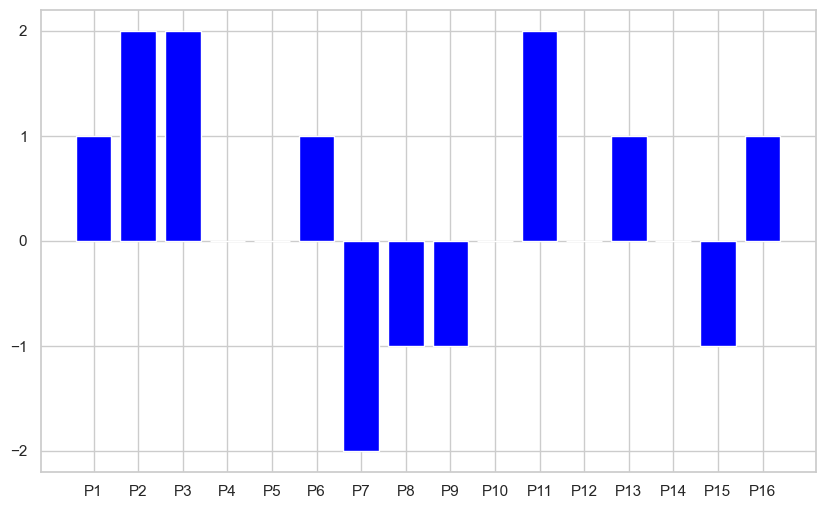

In [495]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[f"P{i}" for i in range(1, 17)], height=juntos['Diferenca'].values, color='blue')
# ax.set_xticks(ticks=np.arange(0, len(juntos['Diferenca'])), labels=[f"P{i}" for i in range(1, 17)])
ax.set_yticks(ticks=[-2, -1, 0, 1, 2])
# sns.despine(left=True)
plt.show()

In [496]:
print("Numero de participantes:", len(juntos))
print("Numero de participantes que acertaram mais no jogo:", len(juntos[juntos["Diferenca"] > 0]))
print("Numero de participantes que acertaram mais na aula:", len(juntos[juntos["Diferenca"] < 0]))
print("Numero de participantes que acertaram o mesmo n√∫mero de perguntas:", len(juntos[juntos["Diferenca"] == 0]))

Numero de participantes: 16
Numero de participantes que acertaram mais no jogo: 7
Numero de participantes que acertaram mais na aula: 4
Numero de participantes que acertaram o mesmo n√∫mero de perguntas: 5


### An√°lise de IRA

In [497]:
# juntos.head()

In [498]:
juntos['Nome'] = juntos["Nome"].str.lower().str.strip()
juntos = juntos.sort_values(by='Nome')
fix_names = {
    "caua de sousa brand√£o": "cau√£ de sousa brand√£o",
    "emanuel avila cruz pires": "emanuel √°vila cruz pires"
}


juntos['Nome'] = juntos['Nome'].replace(fix_names)
# juntos

In [499]:
experimento_exp = experimento[experimento['Grupo'] == 'Experimental'].copy()
experimento_exp['Nome'] = experimento_exp['Nome'].str.lower().str.strip()
experimento_exp = experimento_exp.sort_values(by='Nome')
# experimento_exp

In [500]:
juntos = juntos.merge(experimento_exp[['Nome', 'Curso', 'Nota do IRA Individual', 'Faixa IRA']], how='left', on='Nome')
# juntos = juntos.drop(["Nome", "E-mail"], axis=1)
# juntos

#### Verificando diferen√ßas por ira

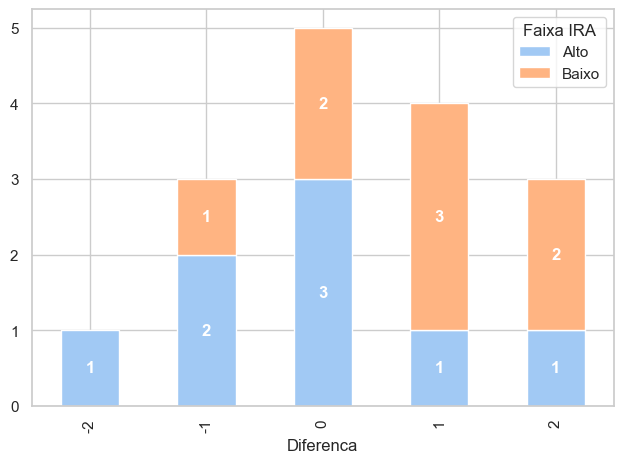

In [501]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Faixa IRA"]).plot(kind='bar', stacked=True)

# Adicionando os r√≥tulos
for container in ax.containers:
    # Adiciona r√≥tulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa com ira alto diminuiu a pontua√ß√£o em 2;
- duas pessoas com ira alto e uma com ira baixo diminuiram a pontua√ß√£o em 1;
- 3 das 4 pessoas que aumentaram a pontua√ß√£o em 1 tinham ira baixo, indicando que o jogo ajudou pessoas com ira baixo;
- o mesmo acontece com pessoa que aumentaram a pontua√ß√£o em 2, com 2 das 3 pessoas tendo ira baixo.

#### Verificando diferen√ßas por Curso

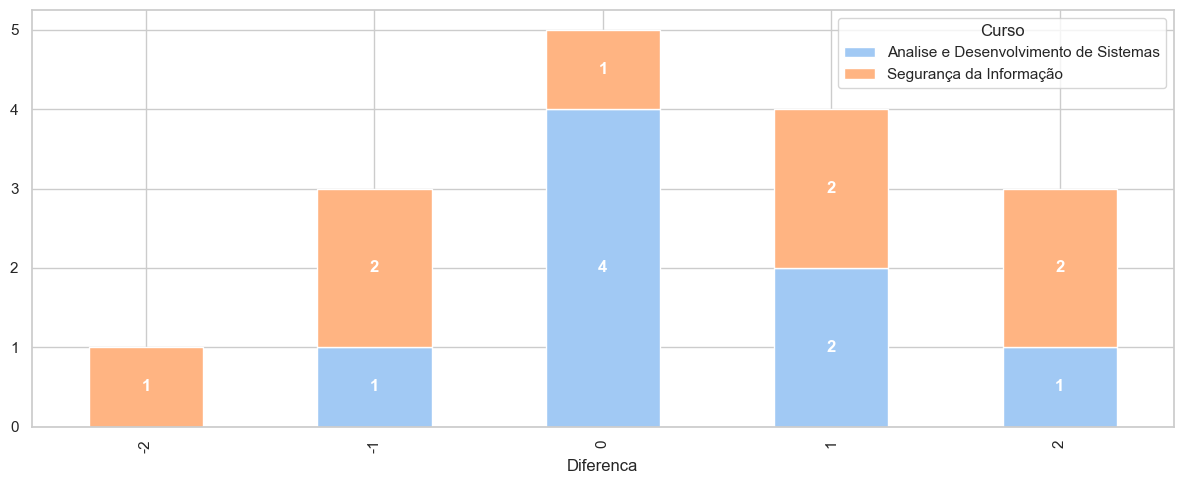

In [502]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Curso"]).plot(kind='bar', stacked=True, figsize=(12, 5))

# Adicionando os r√≥tulos
for container in ax.containers:
    # Adiciona r√≥tulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa de si diminuiu a pontua√ß√£o em 2;
- 2 das 3 pessoas que diminuiram a pontua√ß√£o em 1 eram de si;
- 4 das 5 pessoas que manteram a pontua√ß√£o eram de ADS;
- 2 das 3 pessoas que aumentaram a pontua√ß√£o eram de si

### Realizando o teste

H√° uma diferen√ßa significativa entre as m√©dias das duas condi√ß√µes(antes e depois do teste)?

- **H‚ÇÄ (Hip√≥tese Nula):** A m√©dia das diferen√ßas entre os pares √© zero (ùúáùëë = 0). Ou seja, n√£o h√° impacto significativo do jogo nos acertos.
- **H‚ÇÅ (Hip√≥tese Alternativa):** A m√©dia das diferen√ßas entre os pares √© diferente de zero (ùúáùëë ‚â† 0). Ou seja, o jogo teve um impacto nos acertos.

In [503]:
#teste t pareado
t_stat, p_value = stats.ttest_rel(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula. Houve uma diferen√ßa significativa nos acertos antes e depois do jogo.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa nos acertos antes e depois do jogo.")


t-statistic: 1.0456
p-value: 0.3123
N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa nos acertos antes e depois do jogo.


In [504]:
# impacto real do jogo, n√£o apenas se h√° diferen√ßa.

diff = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

cohen_d = np.mean(diff) / np.std(diff, ddof=1)
print(f"Tamanho do efeito (Cohen‚Äôs d): {cohen_d:.4f}")

Tamanho do efeito (Cohen‚Äôs d): 0.2614


Como o tamanho do efeito foi de 0.2614, isso significa que, mesmo que houvesse uma pequena diferen√ßa, o efeito √© fraco, ou seja, o impacto pr√°tico √© pequeno (o impacto do jogo no desempenho dos jogadores foi m√≠nimo).

analisar o ira, achar uma maneira de identificar os participantes, p1, p2 etc

### Utilizando o wilcoxon

In [505]:
#teste t pareado
t_stat, p_value = stats.wilcoxon(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula. Houve uma diferen√ßa significativa nos acertos antes e depois do jogo.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa nos acertos antes e depois do jogo.")

t-statistic: 21.5000
p-value: 0.2903
N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa nos acertos antes e depois do jogo.


## Controle X Experimental

In [506]:
controle = pre_teste_df[~pre_teste_df["Qual o seu e-mail?"].isin(pos_teste_df["Qual o seu e-mail?"])].copy()
experimental = pos_teste_df.copy()

In [507]:
controle = controle.drop([2, 7, 19, 33], axis=0)

In [508]:
acertos_controle = get_acertos(controle)
# acertos_controle

In [509]:
acertos_experimental = get_acertos(experimental)
# acertos_experimental

In [510]:
media_controle = acertos_controle['Acertos'].mean()
media_experimental = acertos_experimental['Acertos'].mean()

print(f"M√©dia do grupo controle: {media_controle:.2f}")
print(f"M√©dia do grupo experimental: {media_experimental:.2f}")

M√©dia do grupo controle: 10.12
M√©dia do grupo experimental: 8.75


In [511]:
# consertando um erro de digita√ß√£o
experimento.loc[experimento['Nome'] == 'Luis Carlos de Carvalho F. Filho', 'Faixa IRA'] = 'Baixo'

experimento['Nome'] = experimento['Nome'].str.strip().str.lower()
acertos_controle['Nome'] = acertos_controle['Nome'].str.strip().str.lower()
acertos_experimental['Nome'] = acertos_experimental['Nome'].str.strip().str.lower()


ira_controle = experimento.loc[experimento['Grupo'] == 'Controle'].sort_values(by='Nome')
ira_experimental = experimento.loc[experimento['Grupo'] == 'Experimental'].sort_values(by='Nome')

# ira_controle

In [512]:
# ira_experimental

### An√°lise do IRA

In [513]:
ira_controle['Faixa IRA'].value_counts()

Faixa IRA
Baixo    8
Alto     8
Name: count, dtype: int64

In [514]:
ira_experimental['Faixa IRA'].value_counts()

Faixa IRA
Baixo    8
Alto     8
Name: count, dtype: int64

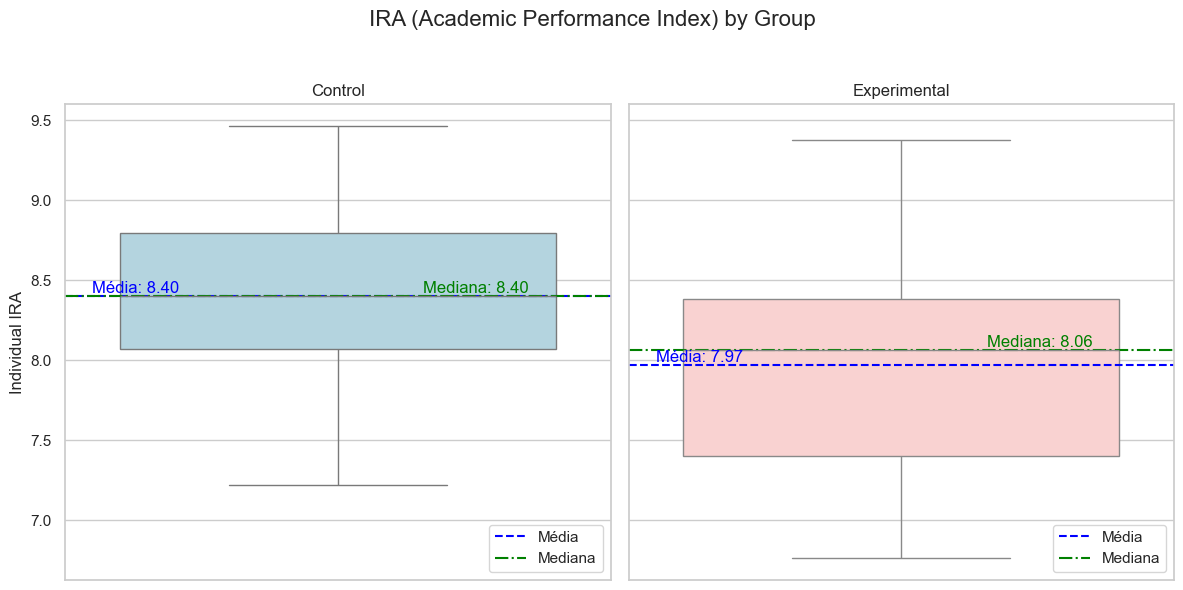

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Fun√ß√£o para adicionar m√©dia e mediana
def add_stats(ax, data):
    mean = data['Nota do IRA Individual'].mean()
    median = data['Nota do IRA Individual'].median()
    
    ax.axhline(mean, color='blue', linestyle='--', linewidth=1.5, label='M√©dia')
    ax.axhline(median, color='green', linestyle='-.', linewidth=1.5, label='Mediana')
    
    # Adiciona os textos em posi√ß√µes diferentes
    ax.text(0.05, mean, f'M√©dia: {mean:.2f}', color='blue', va='bottom', ha='left', 
            transform=ax.get_yaxis_transform())
    ax.text(0.85, median, f'Mediana: {median:.2f}', color='green', va='bottom', ha='right', 
            transform=ax.get_yaxis_transform())

# Grupo controle
sns.boxplot(y='Nota do IRA Individual', data=ira_controle, ax=ax[0], color='#add8e6')
ax[0].set_title('Control')
add_stats(ax[0], ira_controle)

# Grupo experimental
sns.boxplot(y='Nota do IRA Individual', data=ira_experimental, ax=ax[1], color='#ffcccb')
ax[1].set_title('Experimental')
add_stats(ax[1], ira_experimental)

# Eixos e layout
for a in ax:
    a.set_ylabel('Individual IRA')
    a.set_xlabel('')
    a.legend(loc='lower right')

plt.suptitle('IRA (Academic Performance Index) by Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('ira_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()


#### Verificando a normalidade

In [516]:
# controle
shapiro_test = stats.shapiro(acertos_controle['Acertos'])
print(f"Shapiro-Wilk p-valor (controle): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo controle segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo controle n√£o segue uma distribui√ß√£o normal.")

shapiro_test = stats.shapiro(acertos_experimental['Acertos'])

print(f"Shapiro-Wilk p-valor (experimental): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo experimental segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo experimental n√£o segue uma distribui√ß√£o normal.")

Shapiro-Wilk p-valor (controle): 0.0389
O grupo controle n√£o segue uma distribui√ß√£o normal.
Shapiro-Wilk p-valor (experimental): 0.3536
O grupo experimental segue uma distribui√ß√£o aproximadamente normal.


- como um dus grupos n√£o segue uma distribui√ß√£o normal, usaremos um teste n√£o param√©trico

H√° uma diferen√ßa significativa entre as m√©dias entre os grupos?

- **H‚ÇÄ (Hip√≥tese Nula):** A m√©dia das diferen√ßas entre os grupos √© zero (ùúáùëë = 0).
- **H‚ÇÅ (Hip√≥tese Alternativa):** A m√©dia das diferen√ßas entre os grupos √© diferente de zero (ùúáùëë ‚â† 0).

In [517]:
u_stat, p_value = stats.mannwhitneyu(acertos_experimental['Acertos'], acertos_controle['Acertos'])

print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula. H√° uma diferen√ßa significativa entre as m√©dias entre os grupos.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa entre as m√©dias entre os grupos.")

U-statistic: 83.0000
p-value: 0.0883
N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa entre as m√©dias entre os grupos.


In [518]:
# Obtendo o valor Z
z_value = stats.norm.ppf(p_value / 2)

# Calculando r
N = len(acertos_controle) + len(acertos_experimental)
r = z_value / np.sqrt(N)

print(f"r de Rank-Biserial: {r:.3f}")

r de Rank-Biserial: -0.301


In [519]:
u_stat, _ = stats.mannwhitneyu(acertos_controle['Acertos'], acertos_experimental['Acertos'])
n1, n2 = len(experimental), len(controle)
r = 1 - (2 * u_stat) / (n1 * n2)  # positivo = experimental > controle

In [520]:
r

-0.3515625

## Gain Analysis

In [521]:
juntos['Normalized_Gain'] = (juntos['Acertos_pos_jogo'] - juntos['Acertos_pos_aula']) / (12 - juntos['Acertos_pos_aula'])

def ngain_map(x):
    if -1 <= x < 0:
        return "Decrease"
    elif x == 0:
        return "Stable"
    elif 0 < x < 0.3:
        return "Low"
    elif 0.3 <= x < 0.7:
        return "Average"
    elif 0.7 <= x <= 1:
        return "High"
    else:
        return "Out of Range"
    
juntos['Normalized_Gain_Interpretation'] = juntos['Normalized_Gain'].map(ngain_map)

In [522]:
#juntos

In [523]:
juntos.groupby('Faixa IRA')['Normalized_Gain_Interpretation'].value_counts().to_frame()

count
Faixa IRA Normalized_Gain_Interpretation       
Alto      Decrease                            3
          Stable                              3
          Average                             1
          High                                1
Baixo     Average                             2
          Low                                 2
          Stable                              2
          Decrease                            1
          High                                1

In [524]:
nomes = juntos.Nome.tolist()
nomes.append('gabriel felix olivera'.lower().strip())
nomes.append('P√¢mela Gon√ßalves Uch√¥a de Sousa'.lower().strip())

caracterizacao_exp = caracterizacao[caracterizacao['Qual o seu nome?'].str.lower().str.strip().isin(nomes)].copy()

In [525]:
caracterizacao_exp['level'] = caracterizacao_exp['Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?'].map(question_map)
#caracterizacao_exp

In [526]:
caracterizacao_exp['Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?'].value_counts()

Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?
Eu tive aulas sobre isso.                                                   9
Eu participei de exerc√≠cios pr√°ticos em sala de aula.                       5
Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.    1
Eu n√£o tenho familiaridade pr√©via com isso.                                 1
Name: count, dtype: int64

In [527]:
gain_exp = pd.merge(
    juntos[["E-mail", "Normalized_Gain"]],
    caracterizacao_exp[["Qual o seu e-mail?", "Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?"]],
    left_on="E-mail",
    right_on="Qual o seu e-mail?",
    how="inner" 
).drop(columns=["Qual o seu e-mail?"]) 

In [528]:
def level_map(x):
    if x == 'Eu tive aulas sobre isso.':
        return 'Medium'
    elif x == 'Eu participei de exerc√≠cios pr√°ticos em sala de aula.':
        return 'Medium-High'
    elif x == 'Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.':
        return 'Medium-Low'
    elif x == 'Eu n√£o tenho familiaridade pr√©via com isso.':
       return 'Low'
    elif x == 'Eu apliquei isso em um projeto industrial.':
       return 'High' 


In [529]:
def categorias_map(x):
    if x in [
        'Eu n√£o tenho familiaridade pr√©via com isso.',
        'Eu realizei pesquisas pr√©vias em fontes da literatura e recursos online.',
        'Eu tive aulas sobre isso.'
    ]:
        return 'Less-experienced'
    elif x in [
        'Eu participei de exerc√≠cios pr√°ticos em sala de aula.',
        'Eu apliquei isso em um projeto industrial.'
    ]:
        return 'More-experienced'
    else:
        return None


In [530]:
pd.set_option('display.max_colwidth', None) 

#gain_exp['level'] = gain_exp[
    #'Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?'
#].map(level_map)

gain_exp['categories'] = gain_exp[
    'Como voc√™ autoavalia seu n√≠vel de conhecimento em seguran√ßa de software (ou informa√ß√£o)?'
].map(categorias_map)
#gain_exp

Verificando a normalidade

In [531]:
less = gain_exp[gain_exp['categories'] == 'Less-experienced']['Normalized_Gain']
more = gain_exp[gain_exp['categories'] == 'More-experienced']['Normalized_Gain']

# Teste de normalidade para o grupo Less-experienced
shapiro_less = stats.shapiro(less)
print(f"Shapiro-Wilk p-valor (Less-experienced): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo Less-experienced segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo Less-experienced n√£o segue uma distribui√ß√£o normal.")

# Teste de normalidade para o grupo More-experienced
shapiro_more = stats.shapiro(more)
print(f"Shapiro-Wilk p-valor (More-experienced): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo More-experienced segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo More-experienced n√£o segue uma distribui√ß√£o normal.")


Shapiro-Wilk p-valor (Less-experienced): 0.6136
O grupo Less-experienced segue uma distribui√ß√£o aproximadamente normal.
Shapiro-Wilk p-valor (More-experienced): 0.4093
O grupo More-experienced segue uma distribui√ß√£o aproximadamente normal.


- como os dois grupos seguem uma distribui√ß√£o normal, usaremos um teste t

H√° uma diferen√ßa significativa entre as m√©dias entre os grupos?

- **Hip√≥tese Nula (H‚ÇÄ):**  
  O ganho m√©dio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* √© igual.  
  $$
  H_0: \mu_{Less} = \mu_{More}
  $$

- **Hip√≥tese Alternativa (H‚ÇÅ):**  
  O ganho m√©dio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* √© diferente.  
  $$
  H_1: \mu_{Less} \neq \mu_{More}
  $$

Responde mais indiretamente


In [532]:
print("less:", less.mean())
print("more:", more.mean())

less: 0.055000000000000014
more: 0.4066666666666666


In [533]:
# Teste t  (Less-experienced vs More-experienced)
t_stat, p_value = stats.ttest_ind(less, more, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula. H√° diferen√ßa significativa no n√≠vel de conhecimento entre os grupos Less-experienced e More-experienced.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa no n√≠vel de conhecimento entre os grupos Less-experienced e More-experienced.")


t-statistic: -1.4168
p-value: 0.1867
N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de diferen√ßa significativa no n√≠vel de conhecimento entre os grupos Less-experienced e More-experienced.


In [534]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padr√£o combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7148


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que h√° uma diferen√ßa moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o n√≠vel pr√©vio de experi√™ncia influencia o ganho de aprendizado com o jogo ‚Äî jogadores mais experientes se beneficiaram mais.

Pessoas com menos experi√™ncia aprenderam mais que pessoas com mais experi√™ncia?

- **Hip√≥tese Nula (H‚ÇÄ):**  
  O ganho m√©dio (*Normalized_Gain*) do grupo *Less-experienced* √© menor ou igual ao do grupo *More-experienced*.  
  $$
  H_0: \mu_{Less} \leq \mu_{More}
  $$

- **Hip√≥tese Alternativa (H‚ÇÅ):**  
  O ganho m√©dio (*Normalized_Gain*) do grupo *Less-experienced* √© maior que o do grupo *More-experienced*.  
  $$
  H_1: \mu_{Less} > \mu_{More}
  $$

**Nota:** Este √© um teste t unilateral, pois a hip√≥tese tem dire√ß√£o espec√≠fica.


In [535]:
# Teste t unilateral (Less-experienced > More-experienced)
t_stat, p_value_two_sided = stats.ttest_ind(less, more, equal_var=False)

# Para teste unilateral, dividimos o p-valor de duas caudas
p_value_one_sided = p_value_two_sided / 2

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (unilateral): {p_value_one_sided:.4f}")

if t_stat > 0 and p_value_one_sided < 0.05:
    print("Rejeitamos a hip√≥tese nula. Pessoas com menos experi√™ncia aprenderam mais que as com mais experi√™ncia.")
else:
    print("N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de que pessoas com menos experi√™ncia aprenderam mais que as com mais experi√™ncia.")

t-statistic: -1.4168
p-value (unilateral): 0.0934
N√£o rejeitamos a hip√≥tese nula. N√£o h√° evid√™ncias de que pessoas com menos experi√™ncia aprenderam mais que as com mais experi√™ncia.


In [536]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padr√£o combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7148


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que h√° uma diferen√ßa moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o n√≠vel pr√©vio de experi√™ncia influencia o ganho de aprendizado com o jogo ‚Äî jogadores mais experientes se beneficiaram mais.

Pelo IRA

In [537]:
# Separando os grupos a partir da tabela
baixo = juntos[juntos['Faixa IRA'] == 'Baixo']['Normalized_Gain']
alto = juntos[juntos['Faixa IRA'] == 'Alto']['Normalized_Gain']

# Teste de normalidade para o grupo IRA Baixo
shapiro_less = stats.shapiro(baixo)
print(f"Shapiro-Wilk p-valor (IRA Baixo): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo IRA Baixo segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo IRA Baixo n√£o segue uma distribui√ß√£o normal.")

# Teste de normalidade para o grupo IRA Alto
shapiro_more = stats.shapiro(alto)
print(f"Shapiro-Wilk p-valor (IRA Alto): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo IRA Alto segue uma distribui√ß√£o aproximadamente normal.")
else:
    print("O grupo IRA Alto n√£o segue uma distribui√ß√£o normal.")


Shapiro-Wilk p-valor (IRA Baixo): 0.6031
O grupo IRA Baixo segue uma distribui√ß√£o aproximadamente normal.
Shapiro-Wilk p-valor (IRA Alto): 0.4366
O grupo IRA Alto segue uma distribui√ß√£o aproximadamente normal.


In [538]:
print(f"IRA Baixo:{baixo.mean()}")
print(f"IRA Alto:{alto.mean()}")

IRA Baixo:0.29166666666666663
IRA Alto:0.03125


Hip√≥teses para o Teste t sobre o Gain (IRA)

- **Hip√≥tese Nula (H‚ÇÄ):**  
  N√£o h√° diferen√ßa no **ganho m√©dio** (IRA) entre os grupos.  

  $$H_0: \mu_{\text{baixo}} = \mu_{\text{alto}}$$

- **Hip√≥tese Alternativa (H‚ÇÅ):**  
  H√° diferen√ßa no **ganho m√©dio** entre os grupos.  

  $$H_1: \mu_{\text{baixo}} \neq \mu_{\text{alto}}$$


In [539]:
# Teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(baixo, alto, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hip√≥tese nula (H‚ÇÄ). H√° diferen√ßa significativa no ganho m√©dio (IRA) entre os grupos.")
else:
    print("N√£o rejeitamos a hip√≥tese nula (H‚ÇÄ). N√£o h√° evid√™ncias de diferen√ßa significativa no ganho m√©dio (IRA) entre os grupos.")

t-statistic: 1.0703
p-value: 0.3044
N√£o rejeitamos a hip√≥tese nula (H‚ÇÄ). N√£o h√° evid√™ncias de diferen√ßa significativa no ganho m√©dio (IRA) entre os grupos.


In [540]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(baixo), len(alto)
s1, s2 = np.std(baixo, ddof=1), np.std(alto, ddof=1)
mean1, mean2 = np.mean(baixo), np.mean(alto)

# Desvio padr√£o combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: 0.5351


Como o tamanho do efeito foi de Cohen's d = 0.5351, isso indica que h√° uma diferen√ßa moderada no ganho m√©dio (IRA) entre os grupos. O valor positivo mostra que o grupo com IRA Alto obteve ganho m√©dio maior que o grupo baixo. Em outras palavras, o n√≠vel do IRA associado influencia o desempenho, e o impacto pr√°tico √© moderado, sugerindo que as diferen√ßas observadas no IRA s√£o relevantes, mas n√£o extremamente grandes.

In [541]:
desc_table = juntos.merge(gain_exp[['E-mail', 'categories']], on='E-mail', how='right') ## Veficiar, tem um que o email n bate!

desc_table.drop(['Curso', 'E-mail', 'Nota do IRA Individual', 'Normalized_Gain_Interpretation'], axis=1, inplace=True)

desc_table['Mudan√ßa'] = desc_table['Diferenca'].map(lambda x: 'Aumentou' if x > 0 else 'Diminuiu')

In [542]:
desc_table.drop('Nome', axis=1)

Acertos_pos_aula  Acertos_pos_jogo  Diferenca Faixa IRA  Normalized_Gain  \
0                  9                 9          0     Baixo         0.000000   
1                  6                 7          1     Baixo         0.166667   
2                 10                12          2     Baixo         1.000000   
3                  9                 9          0      Alto         0.000000   
4                 10                 9         -1      Alto        -0.500000   
5                 10                10          0      Alto         0.000000   
6                  8                 8          0      Alto         0.000000   
7                  7                 8          1     Baixo         0.200000   
8                 11                12          1      Alto         1.000000   
9                  7                 6         -1     Baixo        -0.200000   
10                10                11          1     Baixo         0.500000   
11                 8                 7         -1      Alto        -0.250000   
12                 9                11          2      Alto         0.666667   
13                 9                11          2     Baixo         0.666667   
14                 9                 7         -2      Alto        -0.666667   

          categories   Mudan√ßa  
0   More-experienced  Diminuiu  
1   More-experienced  Aumentou  
2   More-experienced  Aumentou  
3   Less-experienced  Diminuiu  
4   Less-experienced  Diminuiu  
5   Less-experienced  Diminuiu  
6   Less-experienced  Diminuiu  
7   More-experienced  Aumentou  
8   Less-experienced  Aumentou  
9   Less-experienced  Diminuiu  
10  Less-experienced  Aumentou  
11  Less-experienced  Diminuiu  
12  More-experienced  Aumentou  
13  Less-experienced  Aumentou  
14  Less-experienced  Diminuiu

In [543]:
pd.crosstab(desc_table['categories'], desc_table['Mudan√ßa'])

Mudan√ßa           Aumentou  Diminuiu
categories                          
Less-experienced         3         7
More-experienced         4         1

In [544]:
pd.crosstab(desc_table['Faixa IRA'], desc_table['Mudan√ßa'])

Mudan√ßa    Aumentou  Diminuiu
Faixa IRA                    
Alto              2         6
Baixo             5         2